In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#Import the necessary libraries:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

##Enhancing Predictive Accuracy: Addressing Model Limitations with Alternative Algorithms
---

The Random Forest model produced identical predictions for consecutive years, likely due to the nature of the input data and the features used. This outcome suggests that the model may be overfitting or that the dataset lacks sufficient variability to capture year-to-year changes effectively.

To address this limitation, alternative machine learning algorithms were applied to improve prediction accuracy below for each province.(Linear Regression & Support Vector Machine)

As a future direction, this research plans to incorporate 20 years of daily dengue incidence data along with climatic variables to increase the dataset's size and variability, enhancing the model's ability to make more accurate and robust predictions.

# Prediction for Western Province

In [140]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/Western_Dengue_Data.csv')

In [141]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

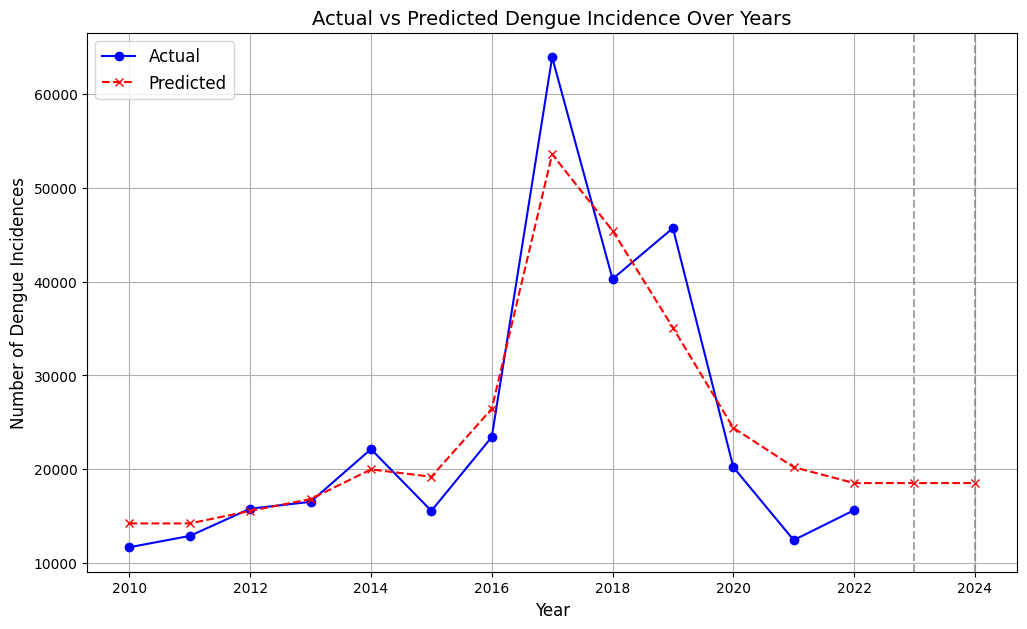

Predicted Total for the year 2022 (Western Province): 18539
Predicted Total for the year 2023 (Western Province): 18539


In [142]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2022, 2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (Western Province): {prediction}")


In [143]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 6966.143333333333
R-squared (R2) Score: 0.7621698529434118


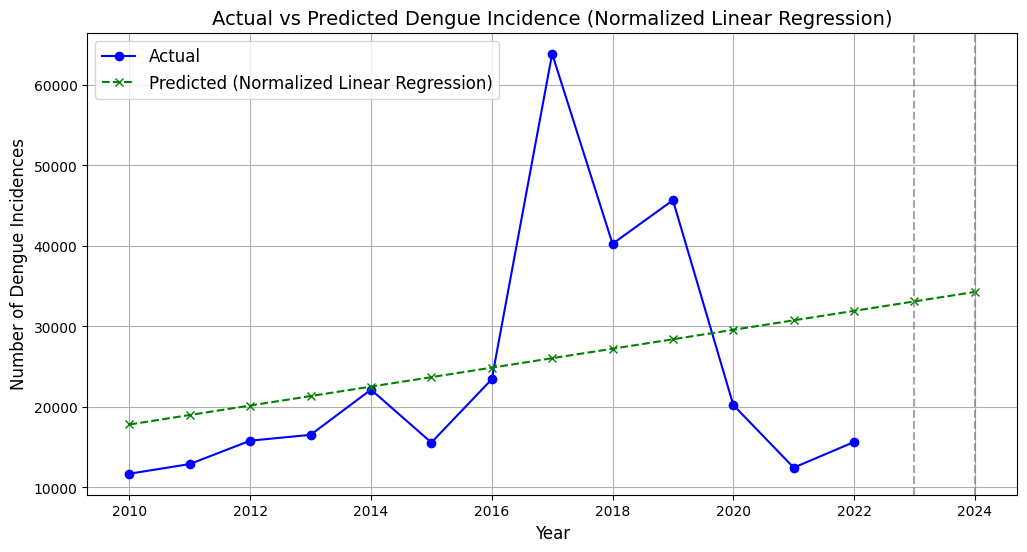

Predicted Total for 2023: 33115
Predicted Total for 2024: 34291


<ipython-input-144-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [144]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")


<ipython-input-145-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-145-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-145-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


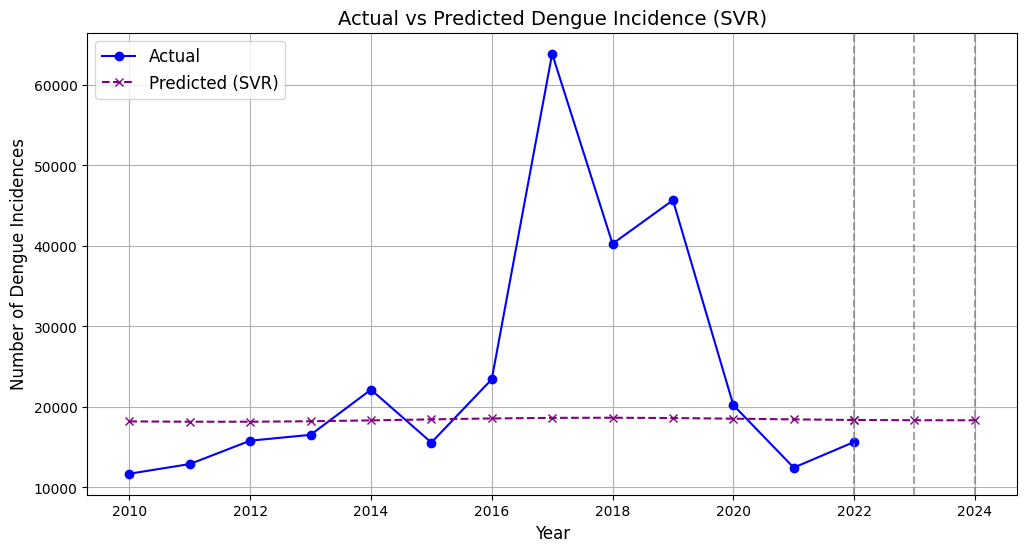

Predicted Total for 2022: 18389
Predicted Total for 2023: 18353
Predicted Total for 2024: 18348


In [145]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")


# Prediction for Central Province

In [146]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/Central_Dengue_Data.csv')

In [147]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

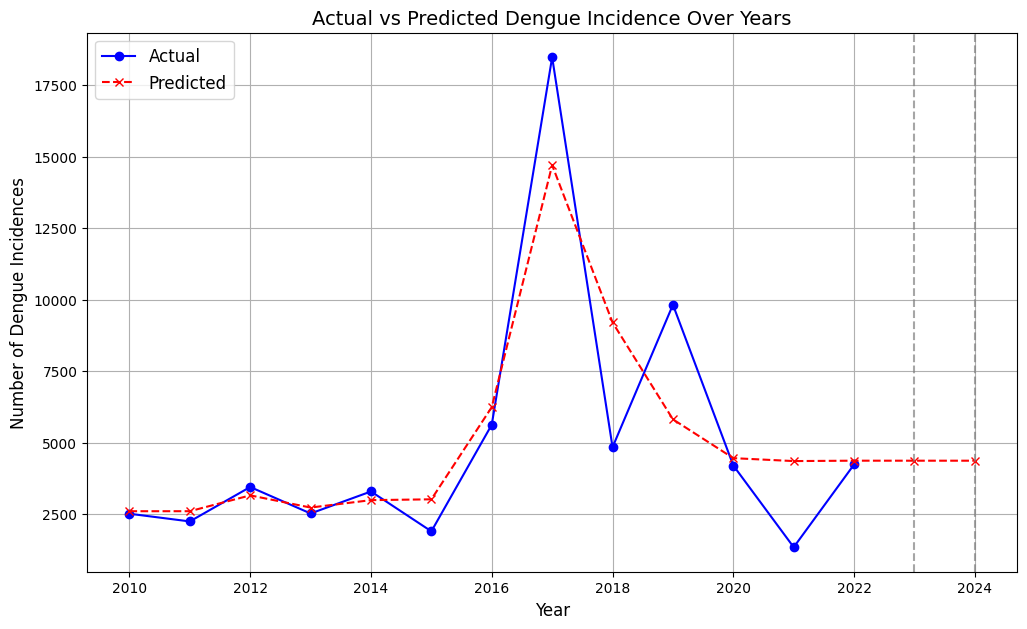

Predicted Total for the year 2023 (Central Province): 4374
Predicted Total for the year 2024 (Central Province): 4374


In [148]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (Central Province): {prediction}")


In [149]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 2367.4466666666667
R-squared (R2) Score: 0.40453255131576626


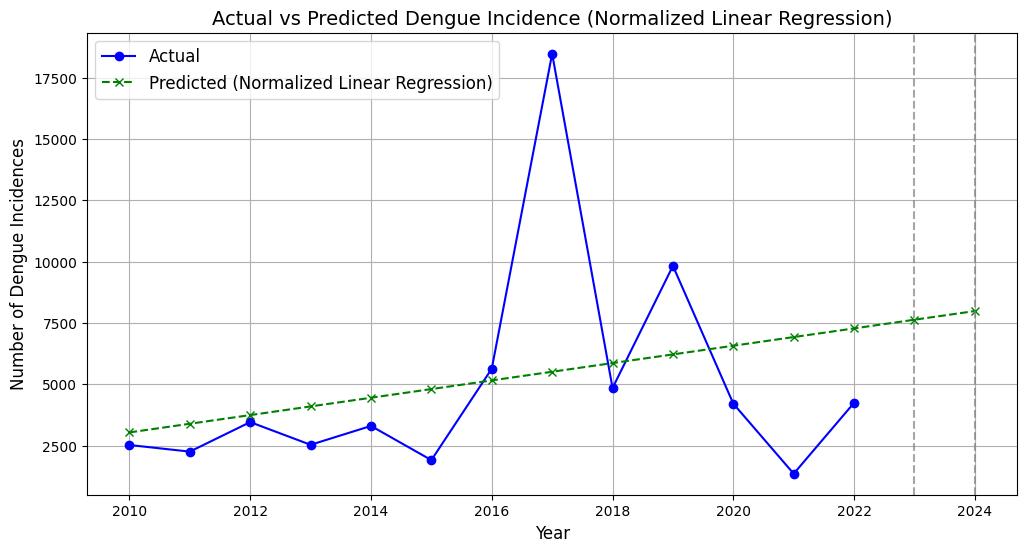

Predicted Total for 2023: 7628
Predicted Total for 2024: 7981


<ipython-input-150-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [150]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-151-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-151-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-151-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


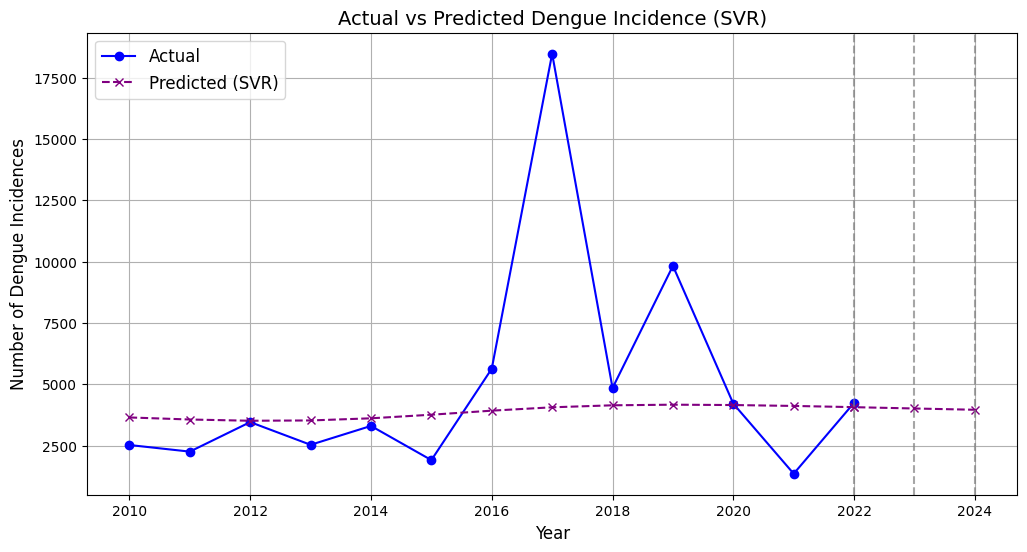

Predicted Total for 2022: 4064
Predicted Total for 2023: 4010
Predicted Total for 2024: 3958


In [151]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")


# Prediction for Southern Province

In [152]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/Southern_Dengue_Data.csv')

In [153]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

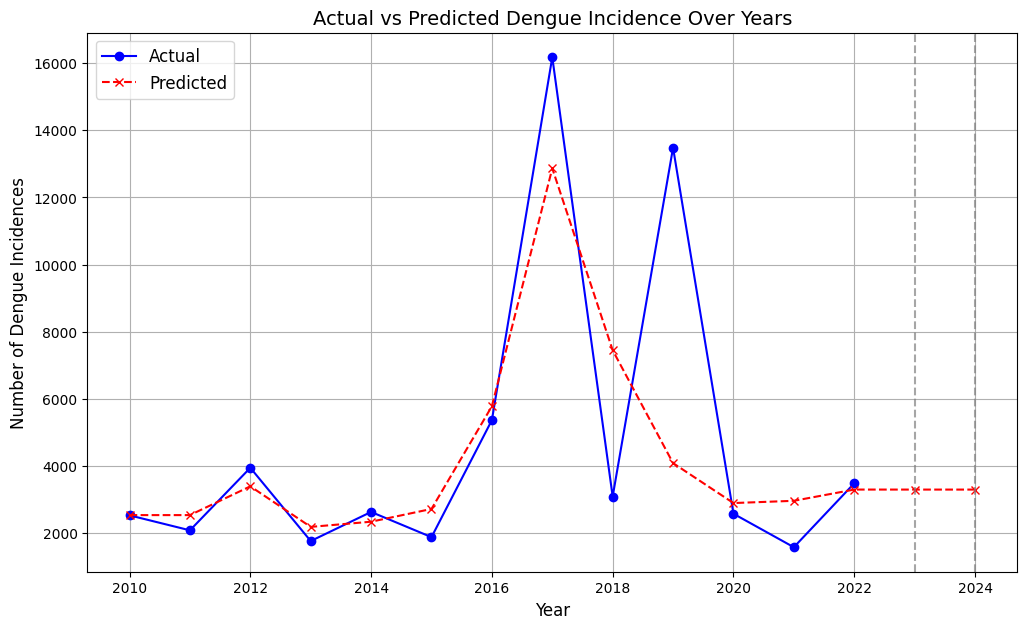

Predicted Total for the year 2023 (Southern Province): 3303
Predicted Total for the year 2024 (Southern Province): 3303


In [154]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (Southern Province): {prediction}")

In [155]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 3593.0433333333335
R-squared (R2) Score: -0.030879346275188846


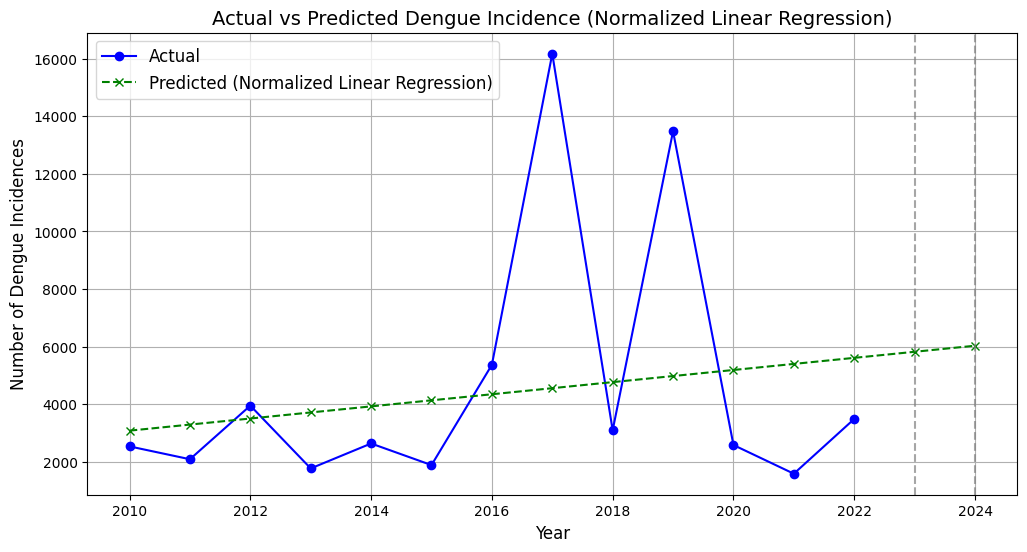

Predicted Total for 2023: 5822
Predicted Total for 2024: 6032


<ipython-input-156-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [156]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-157-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-157-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-157-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


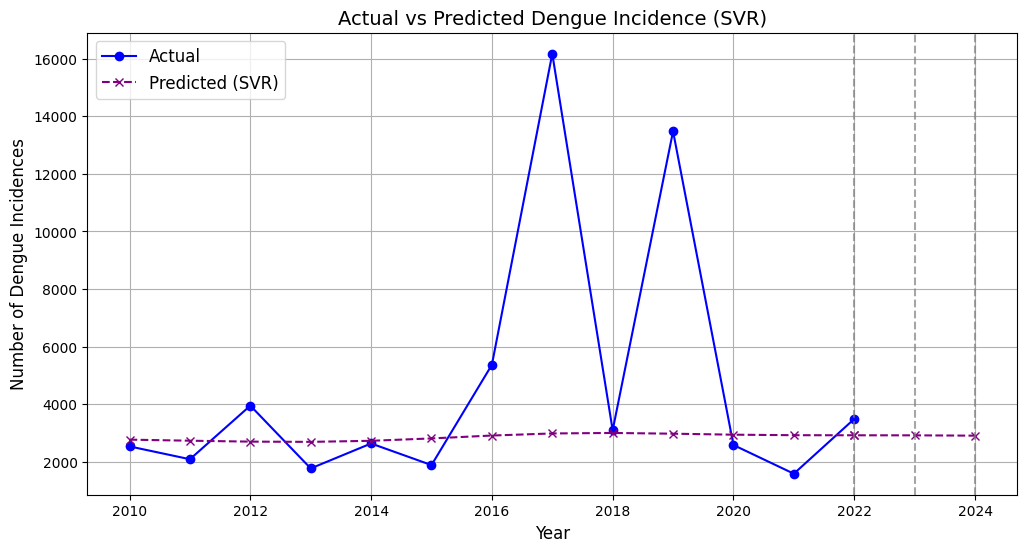

Predicted Total for 2022: 2922
Predicted Total for 2023: 2920
Predicted Total for 2024: 2909


In [157]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")

# Prediction for Northen Province

In [158]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/Northern_Dengue_Data.csv')

In [159]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

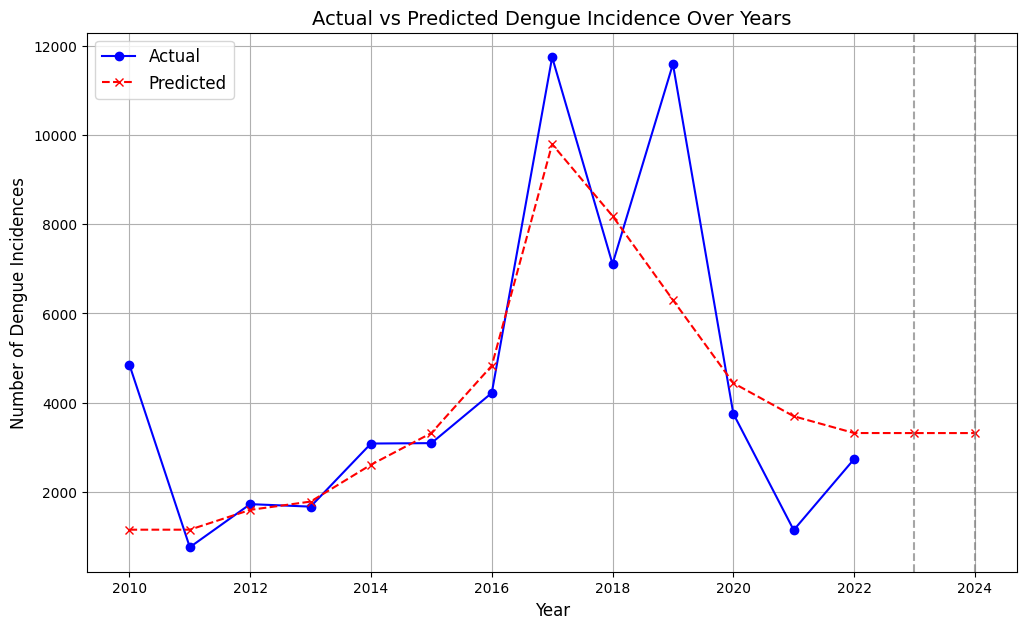

Predicted Total for the year 2023 (Northen Province): 3316
Predicted Total for the year 2024 (Northen Province): 3316


In [160]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (Northen Province): {prediction}")


In [161]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 3850.3666666666663
R-squared (R2) Score: 0.14158276211125664


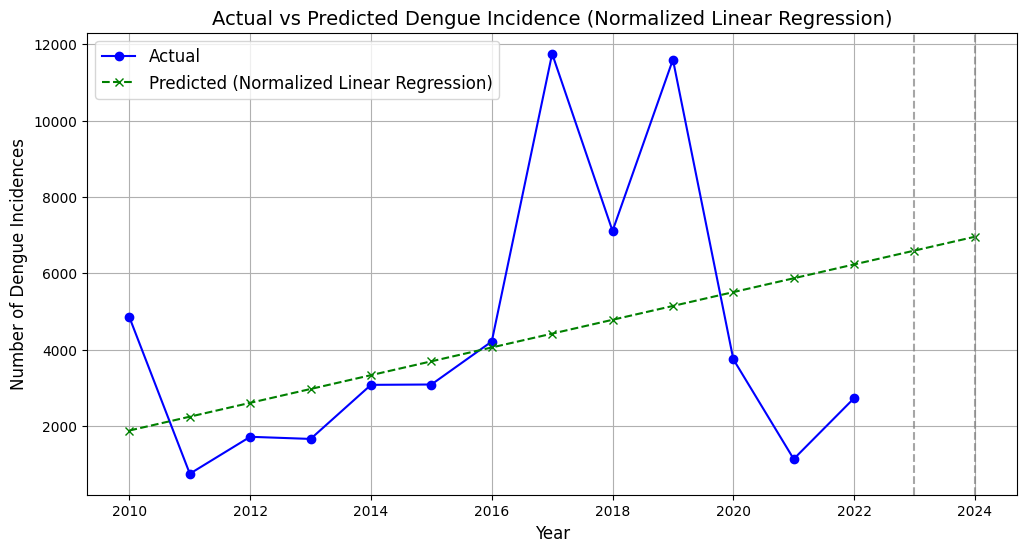

Predicted Total for 2023: 6596
Predicted Total for 2024: 6958


<ipython-input-162-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [162]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-163-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-163-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-163-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


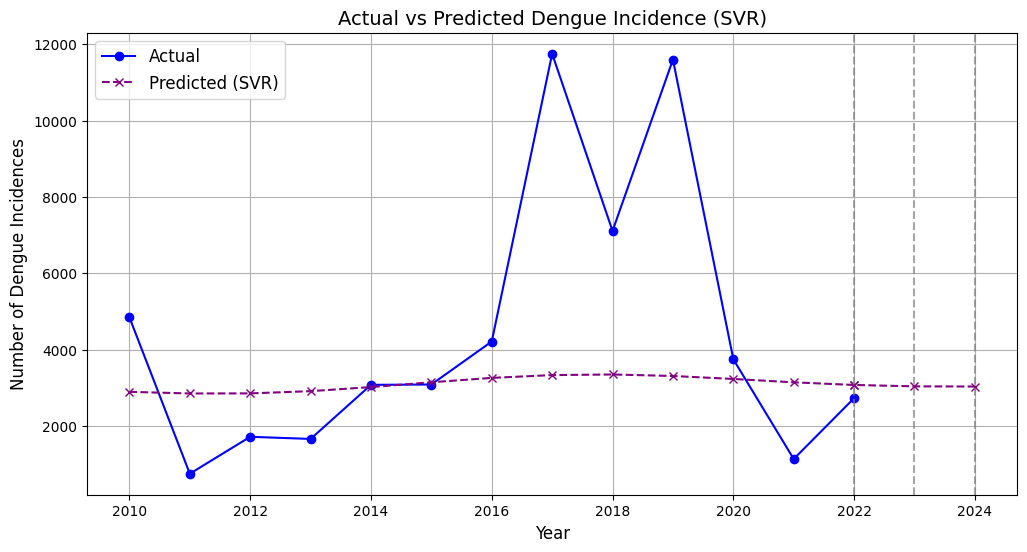

Predicted Total for 2022: 3078
Predicted Total for 2023: 3042
Predicted Total for 2024: 3037


In [163]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")

# Prediction for North West Province

In [164]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/North_West_Dengue_Data.csv')

In [165]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

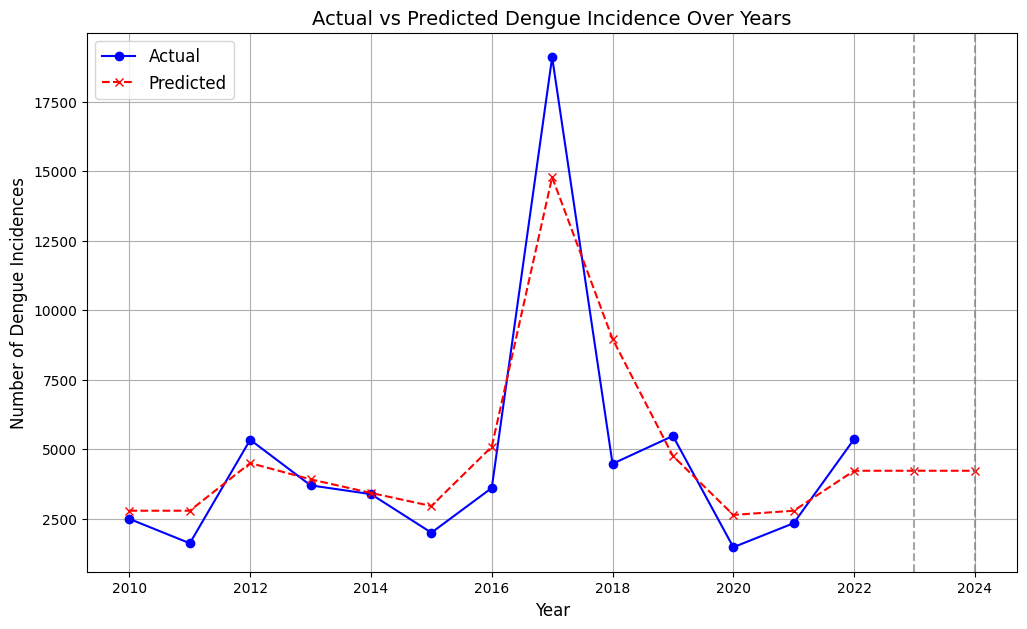

Predicted Total for the year 2023 (North West Province): 4222
Predicted Total for the year 2024 (North West Province): 4222


In [166]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (North West Province): {prediction}")


In [167]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 488.0466666666666
R-squared (R2) Score: 0.8711219992493557


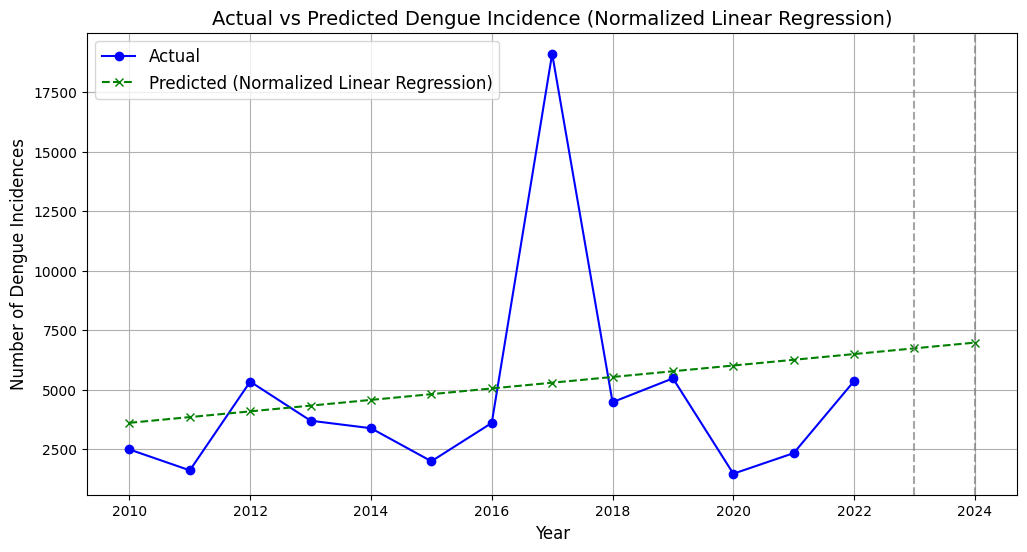

Predicted Total for 2023: 6735
Predicted Total for 2024: 6976


<ipython-input-168-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [168]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-169-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-169-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-169-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


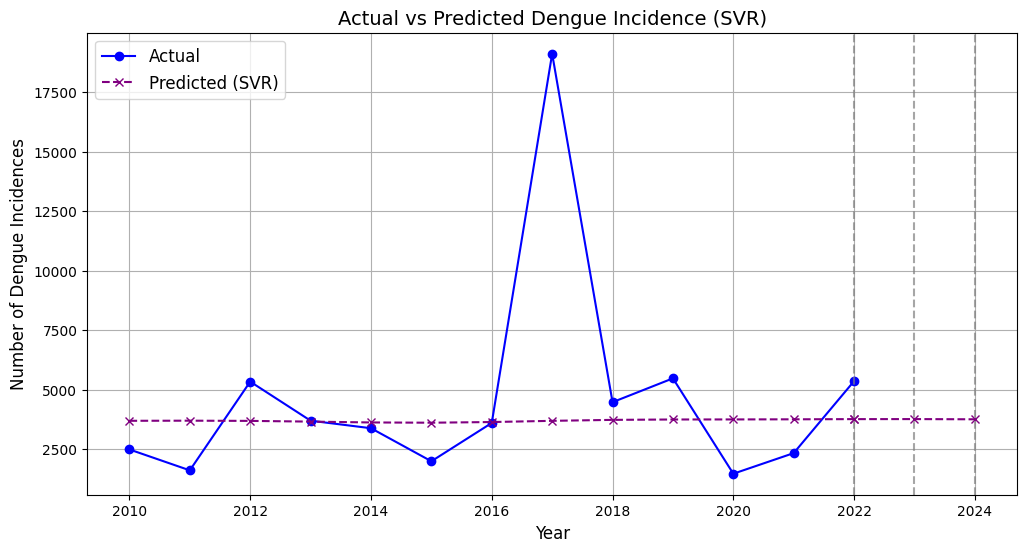

Predicted Total for 2022: 3762
Predicted Total for 2023: 3764
Predicted Total for 2024: 3755


In [169]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")

# Prediction for North Central Province

In [170]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/North_Central_Dengue_Data.csv')

In [171]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

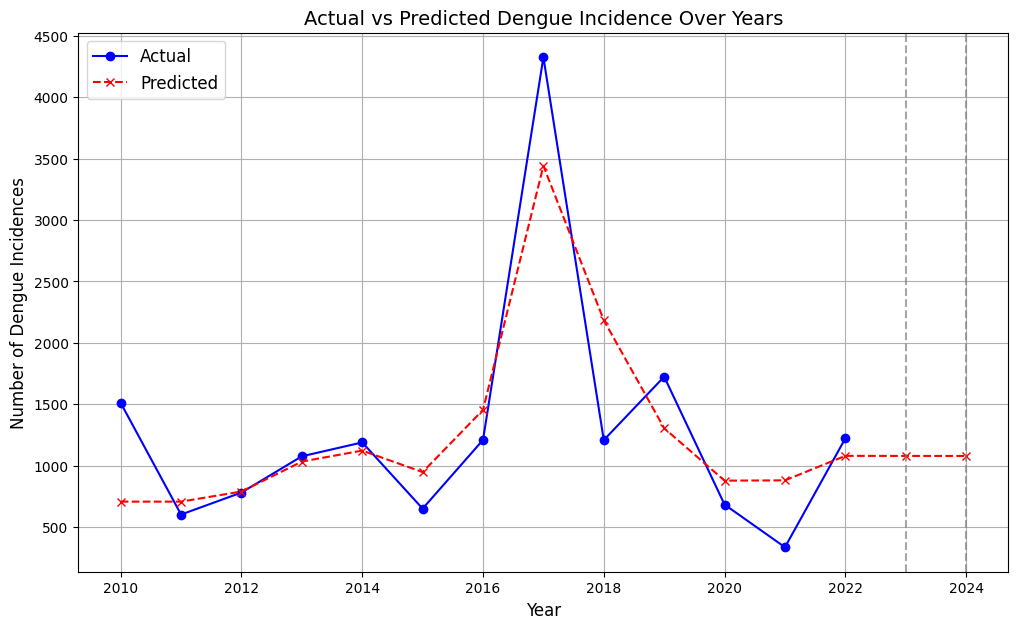

Predicted Total for the year 2023 (North Central Province): 1080
Predicted Total for the year 2024 (North Central Province): 1080


In [172]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (North Central Province): {prediction}")


In [173]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 589.2333333333333
R-squared (R2) Score: -0.0009188550286378661


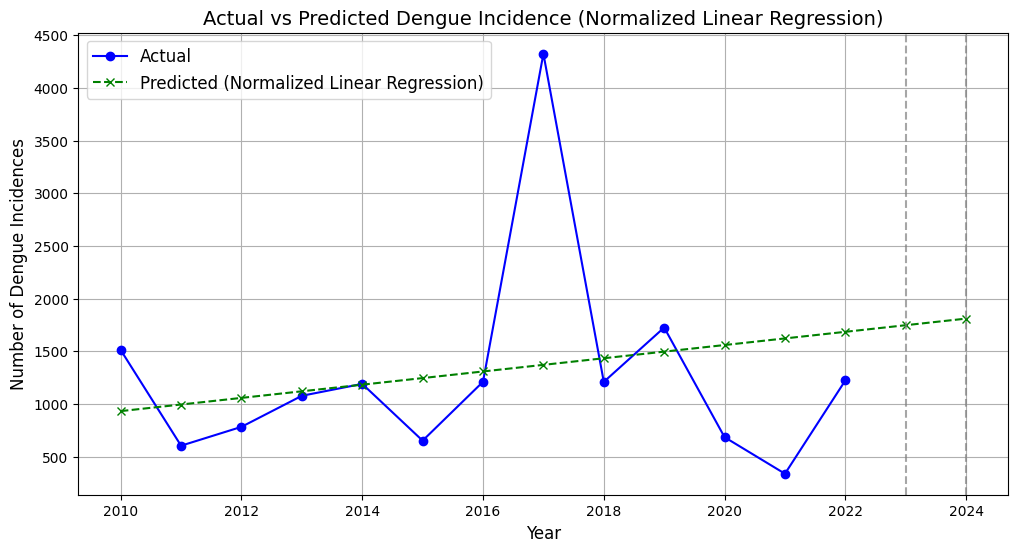

Predicted Total for 2023: 1747
Predicted Total for 2024: 1809


<ipython-input-174-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [174]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-175-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-175-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-175-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


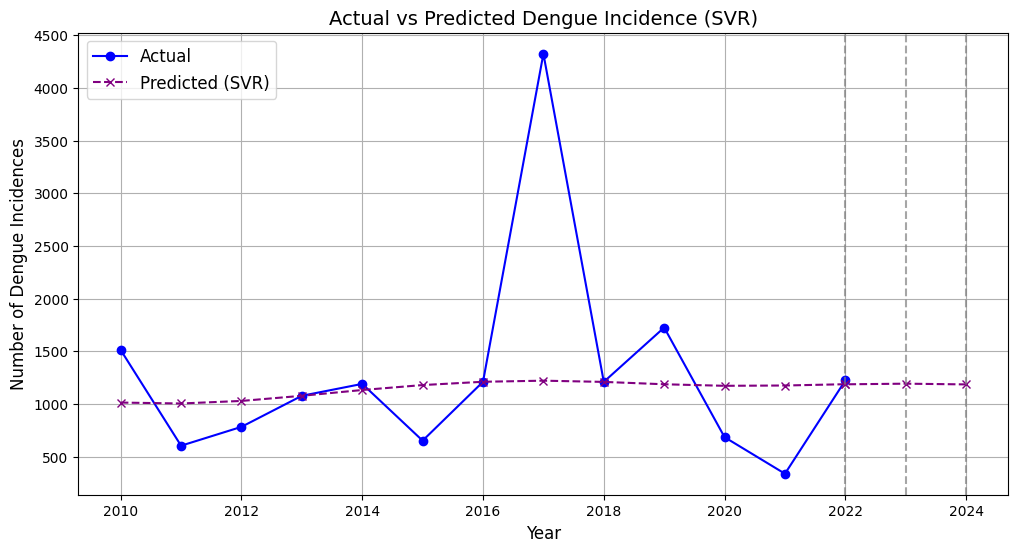

Predicted Total for 2022: 1186
Predicted Total for 2023: 1192
Predicted Total for 2024: 1185


In [175]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")

# Prediction for Uva Province

In [176]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/Uva_Dengue_Data.csv')

In [177]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

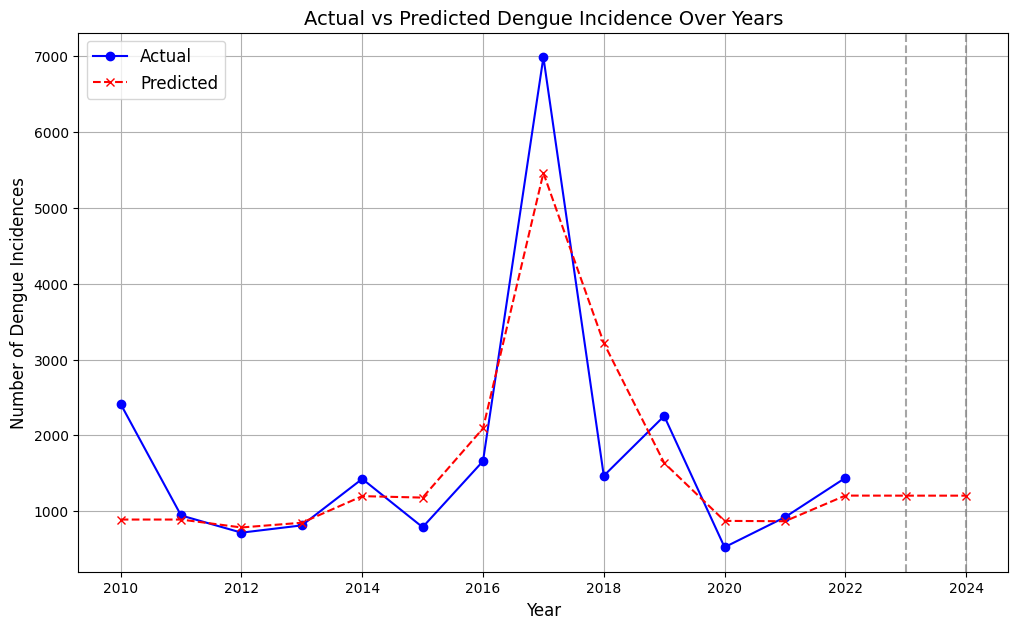

Predicted Total for the year 2023 (Uva Province): 1205
Predicted Total for the year 2024 (Uva Province): 1205


In [178]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (Uva Province): {prediction}")


In [179]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 731.7133333333333
R-squared (R2) Score: -1.0136018960527804


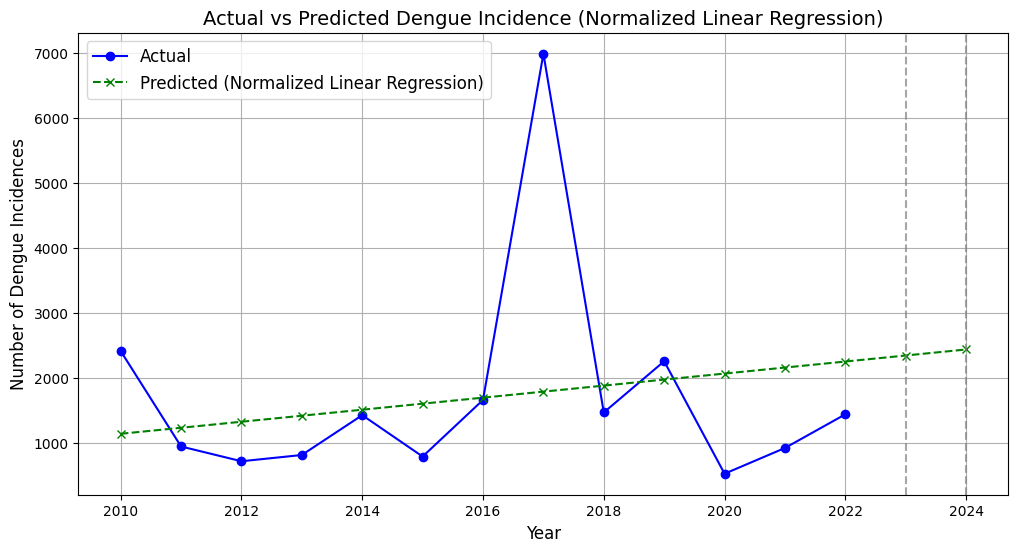

Predicted Total for 2023: 2343
Predicted Total for 2024: 2436


<ipython-input-180-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [180]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-181-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-181-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-181-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


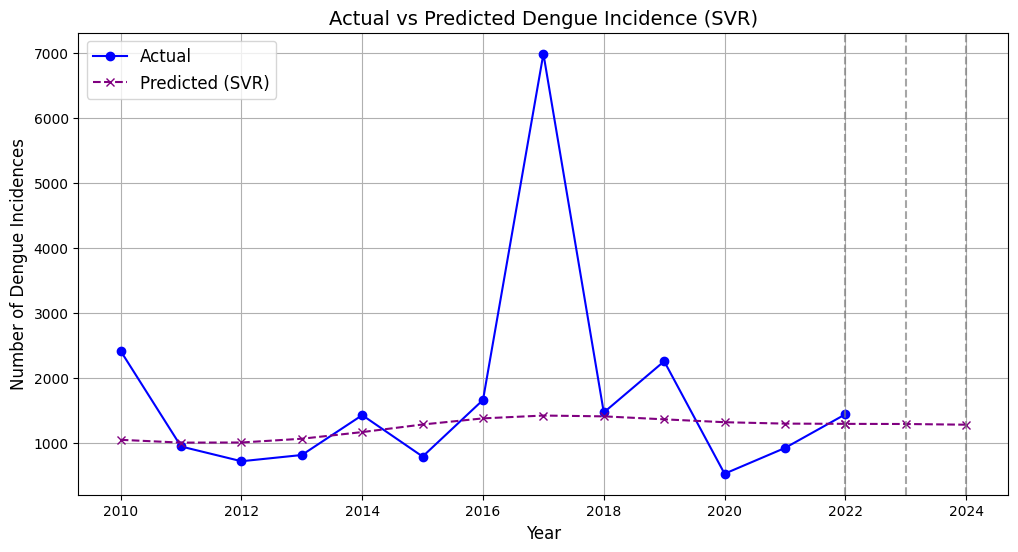

Predicted Total for 2022: 1292
Predicted Total for 2023: 1290
Predicted Total for 2024: 1279


In [181]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")

# Prediction for Sabaragamuwa Province

In [182]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/Sabaragamuwa_Dengue_Data.csv')

In [183]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

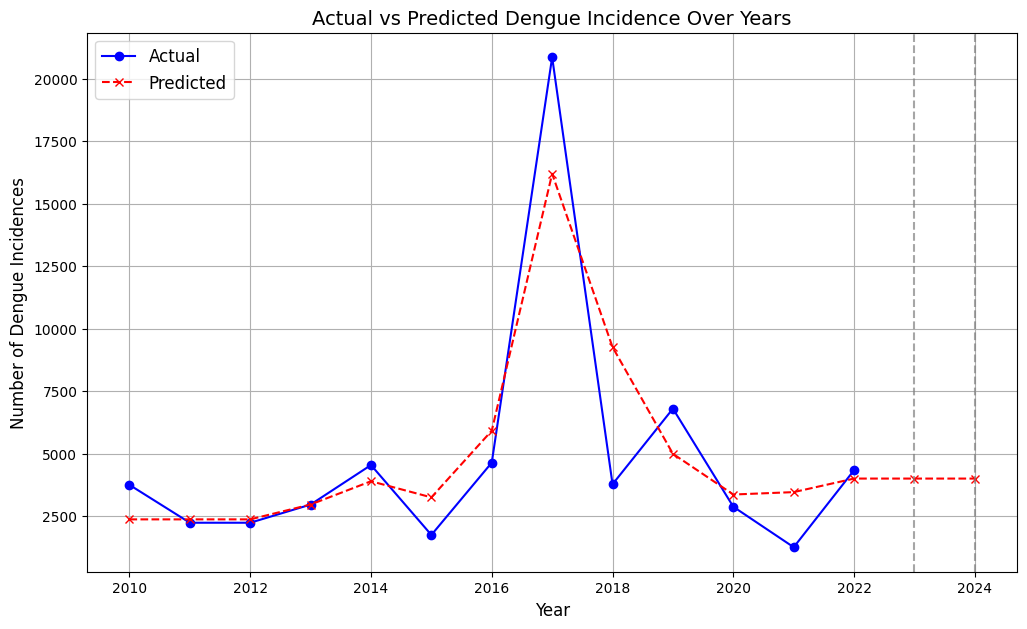

Predicted Total for the year 2023 (Sabaragamuwa Province: 4006
Predicted Total for the year 2024 (Sabaragamuwa Province: 4006


In [184]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (Sabaragamuwa Province: {prediction}")


In [185]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 1796.7299999999998
R-squared (R2) Score: 0.349221336993939


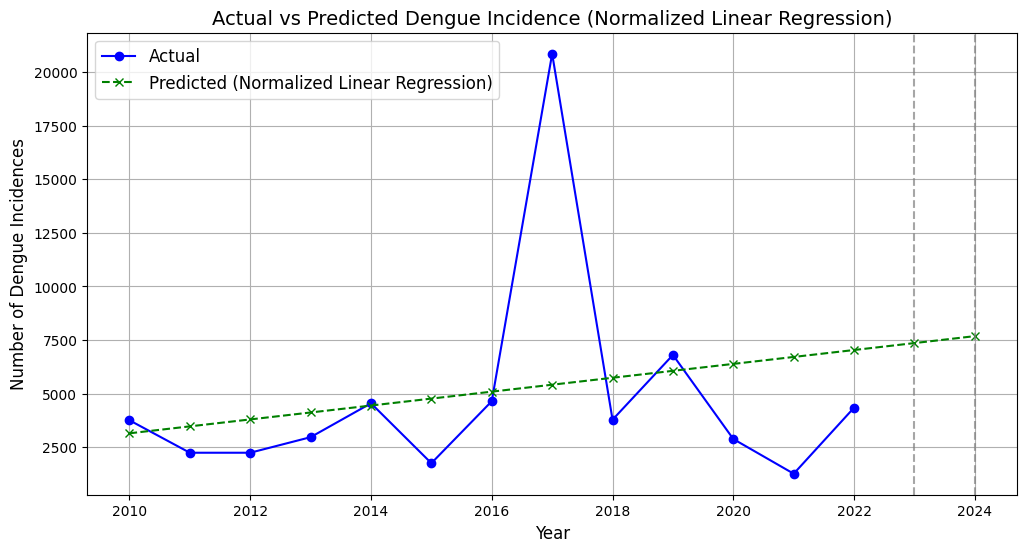

Predicted Total for 2023: 7356
Predicted Total for 2024: 7679


<ipython-input-186-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [186]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-187-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-187-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-187-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


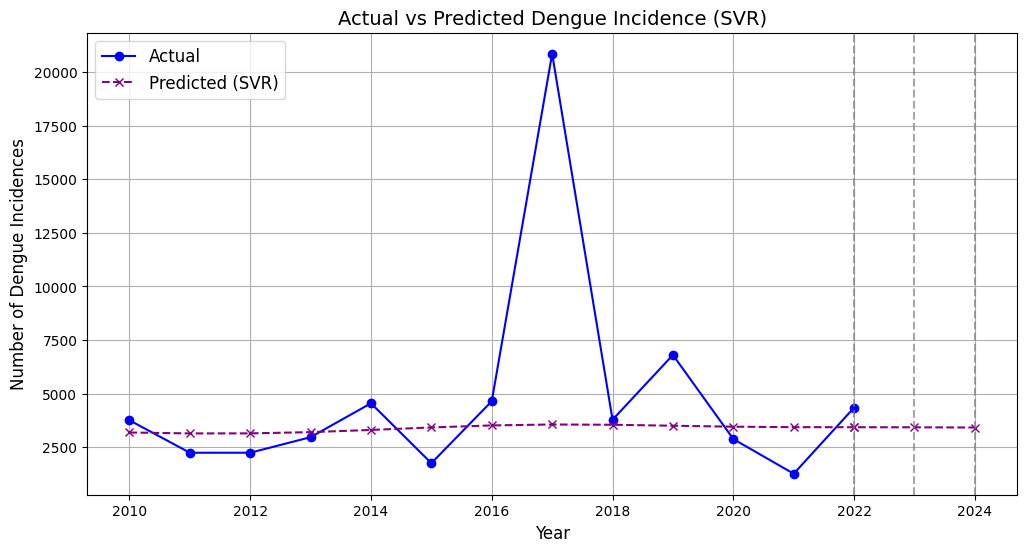

Predicted Total for 2022: 3430
Predicted Total for 2023: 3427
Predicted Total for 2024: 3417


In [187]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")

# Prediction for Eastern Province

In [188]:
#Load the CSV dataset into a pandas DataFrame:
dataset = pd.read_csv('/content/drive/My Drive/Total Incidence/Eastern_Dengue_Data.csv')

In [189]:
#Split the dataset into input features (Year) and target variable (Total):
X = dataset['Year'].values.reshape(-1, 1)
y = dataset ['Number of Dengue Incidence'].values

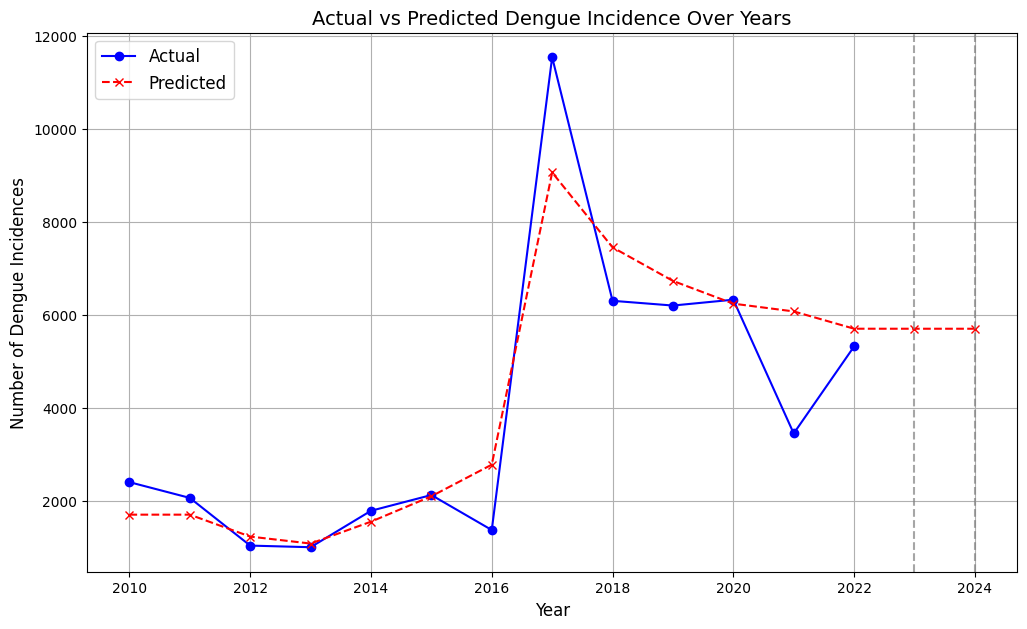

Predicted Total for the year 2023 (Eastern Province): 5706
Predicted Total for the year 2024 (Eastern Province): 5706


In [190]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Perform predictions for 2022, 2023, and 2024
future_years = [[2023], [2024]]
predicted_future = rf_regressor.predict(future_years)

# Convert predictions to integers
predicted_future_integers = [int(value) for value in predicted_future]

# Add the predicted values for future years to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]  # Append None for actual values
predicted_values = list(rf_regressor.predict(X)) + predicted_future_integers  # Add predictions for future years

# Plot the actual and predicted values
plt.figure(figsize=(12, 7))
plt.plot(years[:len(dataset)], actual_values[:len(dataset)], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted', marker='x', linestyle='--', color='red')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions for future years
for year, prediction in zip([2023, 2024], predicted_future_integers):
    print(f"Predicted Total for the year {year} (Eastern Province): {prediction}")


In [191]:
# Use the trained regression model (rf_regressor) to make predictions on the test set (X_test)
y_pred = rf_regressor.predict(X_test)

# Calculate the Mean Absolute Error (MAE) between the true target values (y_test) and predicted values (y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Calculate the R-squared (R2) score to assess the goodness of fit of the model
r2 = r2_score(y_test, y_pred)

# Print the Mean Absolute Error (MAE) to evaluate the average absolute difference between true and predicted values
print("Mean Absolute Error (MAE):", mae)

# Print the R-squared (R2) score to assess the proportion of variance explained by the model
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 1285.0533333333333
R-squared (R2) Score: 0.005176661384518333


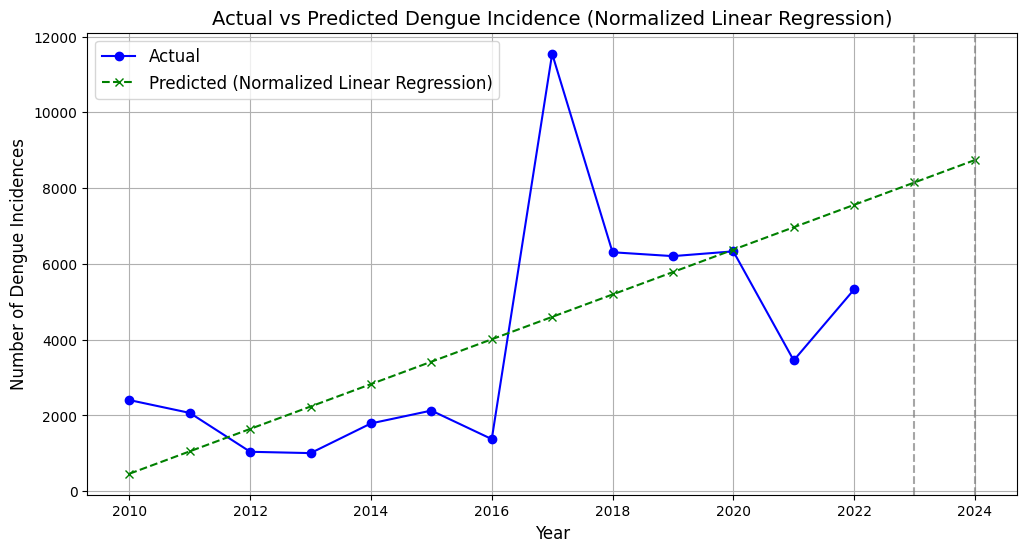

Predicted Total for 2023: 8149
Predicted Total for 2024: 8741


<ipython-input-192-0237772ae5f4>:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Total for {year}: {int(predicted_values[i])}")


In [192]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values.reshape(-1, 1)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_normalized, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict for specific years (2023 and 2024)
years_to_predict = np.array([[2023], [2024]])
years_normalized = scaler_X.transform(years_to_predict)

predicted_normalized = linear_model.predict(years_normalized)
predicted_values = scaler_y.inverse_transform(predicted_normalized)

# Add the predicted values to the dataset for visualization
years = list(dataset['Year'].values) + [2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None]
predicted_years = list(linear_model.predict(X_normalized)) + list(predicted_normalized)
predicted_years_actual = scaler_y.inverse_transform(np.array(predicted_years).reshape(-1, 1)).ravel()

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-2], actual_values[:-2], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_years_actual, label='Predicted (Normalized Linear Regression)', marker='x', linestyle='--', color='green')  # Predicted values
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (Normalized Linear Regression)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
for i, year in enumerate([2023, 2024]):
    print(f"Predicted Total for {year}: {int(predicted_values[i])}")

<ipython-input-193-5082e94a69d9>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2022_integer = int(predicted_2022)
<ipython-input-193-5082e94a69d9>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2023_integer = int(predicted_2023)
<ipython-input-193-5082e94a69d9>:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_2024_integer = int(predicted_2024)


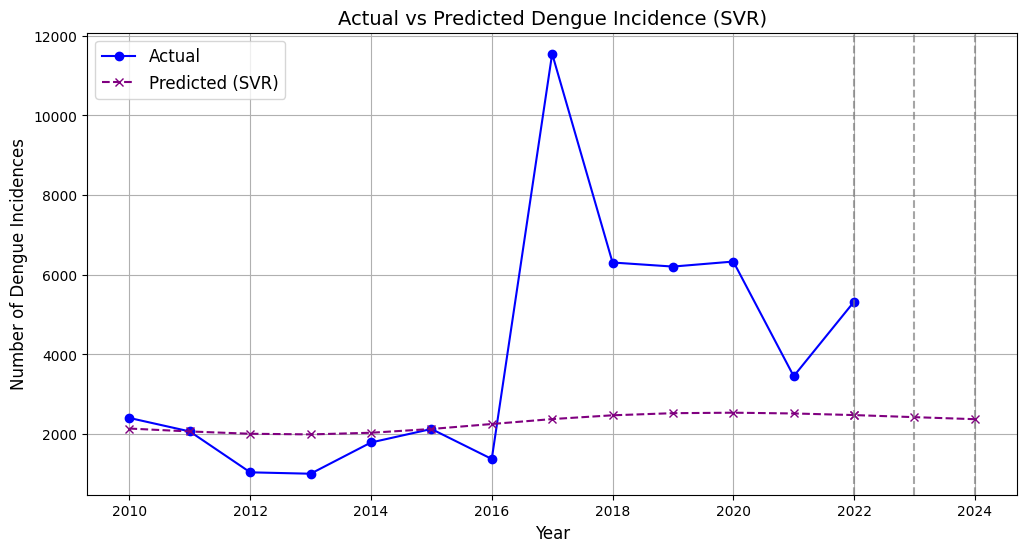

Predicted Total for 2022: 2477
Predicted Total for 2023: 2425
Predicted Total for 2024: 2374


In [193]:
# Split the dataset into input features (Year) and target variable (Number of Dengue Incidence)
X = dataset['Year'].values.reshape(-1, 1)
y = dataset['Number of Dengue Incidence'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict for specific years (2022, 2023, and 2024)
year_2022 = [[2022]]
year_2023 = [[2023]]
year_2024 = [[2024]]

predicted_2022 = svr_model.predict(year_2022)
predicted_2023 = svr_model.predict(year_2023)
predicted_2024 = svr_model.predict(year_2024)

# Convert predictions to integers
predicted_2022_integer = int(predicted_2022)
predicted_2023_integer = int(predicted_2023)
predicted_2024_integer = int(predicted_2024)

# Update the dataset for visualization
years = list(dataset['Year'].values) + [2022, 2023, 2024]
actual_values = list(dataset['Number of Dengue Incidence'].values) + [None, None, None]
predicted_values = list(svr_model.predict(X)) + [predicted_2022_integer, predicted_2023_integer, predicted_2024_integer]

# Plot the actual and predicted values
plt.figure(figsize=(12, 6))
plt.plot(years[:-3], actual_values[:-3], label='Actual', marker='o', color='blue')  # Actual values
plt.plot(years, predicted_values, label='Predicted (SVR)', marker='x', linestyle='--', color='purple')  # Predicted values
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2022
plt.axvline(x=2023, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2023
plt.axvline(x=2024, color='gray', linestyle='--', alpha=0.7)  # Highlight the year 2024

# Add labels, title, and legend
plt.title('Actual vs Predicted Dengue Incidence (SVR)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Dengue Incidences', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Print the predictions
print(f"Predicted Total for 2022: {predicted_2022_integer}")
print(f"Predicted Total for 2023: {predicted_2023_integer}")
print(f"Predicted Total for 2024: {predicted_2024_integer}")